In [1]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
from scipy import stats, signal

In [2]:
potential_density_WS_CM2MC = np.loadtxt('potential_density_weddell_average.dat')
potential_density_WS_ESM2G = np.loadtxt('density_WS_ESM2G.dat')
potential_density_RS_ESM2G = np.loadtxt('density_RS_ESM2G.dat')
depths_CM2MC = np.loadtxt('depths.dat')
depths_ESM2G = np.loadtxt('depth_ESM2G.dat')
temp_conv_WS_ESM2G = np.loadtxt('WS_index_depth_ESM2G.dat')
AMOC_max_ESM2G = np.loadtxt('AMOC_max_ESM2G.dat')

In [3]:
print(depths_ESM2G[30],depths_ESM2G[39])

524.170593261719 2048.82861328125


In [4]:
con_ind_ws_500_ESM2G = -1 * (temp_conv_WS_ESM2G[:,30] - np.mean(temp_conv_WS_ESM2G[:,30]))/np.std(temp_conv_WS_ESM2G[:,30])
con_ind_ws_2000_ESM2G = -1 * (temp_conv_WS_ESM2G[:,39] - np.mean(temp_conv_WS_ESM2G[:,39]))/np.std(temp_conv_WS_ESM2G[:,39])

Text(0.5, 1.0, 'Convection index timeseries (-1 * Temperature at 2000 m, normalized) \n Weddell Sea, year 1 - 500, ESM2G')

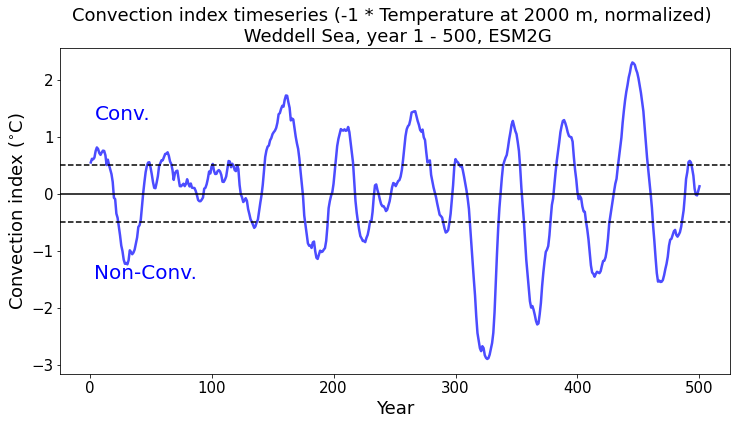

In [8]:
pltind = con_ind_ws_2000_ESM2G

fig = plt.figure(figsize=(12,6))

plt.plot(np.arange(1, 501, 1), pltind, 'b', linewidth = 2.5, alpha=0.7)
l = plt.axhline(y=-0.5, color='k', linestyle ='--')
l = plt.axhline(y=0, color='k')
l = plt.axhline(y=0.5, color='k', linestyle ='--')

plt.text(4, 1.4, 'Conv.', horizontalalignment='left', verticalalignment='center', fontsize=20, color='b')
plt.text(4, -1.4, 'Non-Conv.', horizontalalignment='left', verticalalignment='center', fontsize=20, color='b')

plt.ylabel('Convection index ($^{\circ}$C)', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Convection index timeseries (-1 * Temperature at 2000 m, normalized) \n Weddell Sea, year 1 - 500, ESM2G', fontsize=18)

In [20]:
# Butterworth filter (?)
CutOff_T = 35 # Cut-off period 
n_order = 4 # Order of filtering

fs = 1  # Sampling frequency, equal to 1 year in our case
fc = 1/CutOff_T  # Cut-off frequency of the filter
ww = fc / (fs / 2) # Normalize the frequency
bb, aa = signal.butter(n_order, ww, 'low')

con_ind_ws_500_ESM2G_BWfilt = signal.filtfilt(bb, aa, con_ind_ws_500_ESM2G)
con_ind_ws_2000_ESM2G_BWfilt = signal.filtfilt(bb, aa, con_ind_ws_2000_ESM2G)

In [21]:
AMOC_max_ESM2G.shape

(500, 181)

In [22]:
AMOC_max_ESM2G_BWfilt = []
for i in range(AMOC_max_ESM2G.shape[1]):
    AMOC_max_ESM2G_BWfilt.append(signal.filtfilt(bb, aa, AMOC_max_ESM2G[:,i]))

In [23]:
def lag_cor_data(x,y,lag):
    stat=[]
    from scipy import stats
    for i in range(2*lag):
        slope, intercept, r_value, p_value, std_err = stats.linregress(x[lag:len(x)-lag], y[i:len(y)-2*lag+i])
        stat.append(r_value)
    return stat

In [29]:
AMOC_max_ESM2G_BWfilt_cut = np.array(AMOC_max_ESM2G_BWfilt)[20:161,:]

In [30]:
AMOC_max_ESM2G_BWfilt_cut.shape

(141, 500)

Text(0.5, 1.0, 'Weddell Sea peak convection vs. AMOC (max streamfunction) \n Butterworth filtered (35yr cur-off, 4th order), year 1 - 500, ESM2G')

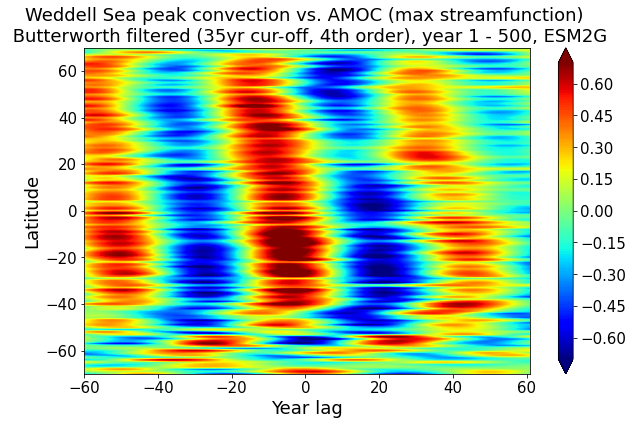

In [32]:
lag_time = 60

fig = plt.figure(figsize=(10,6))

pltdata = []
for i in range(AMOC_max_ESM2G_BWfilt_cut.shape[0]):
    r = lag_cor_data(con_ind_ws_500_ESM2G_BWfilt, AMOC_max_ESM2G_BWfilt_cut[i,:], lag_time)
    pltdata.append(r)
pltdata = np.asarray(pltdata)
x = np.linspace(-lag_time, lag_time+1, 2*lag_time)
y = np.arange(-70, 71, 1)

x,y = np.meshgrid(x,y)
cmap_limit = np.nanmax(np.abs(pltdata))
levels = np.arange(-0.7,0.71,0.01)
im = plt.contourf(x, y, pltdata, levels, extend = 'both', cmap = plt.cm.jet)
cb = plt.colorbar(im)
cb.ax.tick_params(labelsize=15)
plt.xlabel('Year lag', fontsize = 18)
plt.ylabel('Latitude', fontsize = 18)
plt.xticks(fontsize = 15)    
plt.yticks(fontsize = 15)
plt.title('Weddell Sea peak convection vs. AMOC (max streamfunction) \n Butterworth filtered ({}yr cur-off, {}th order), year 1 - 500, ESM2G'.format(
    CutOff_T, n_order), fontsize = 18)

Text(0.5, 1.0, 'Weddell Sea peak convection vs. AMOC (max streamfunction) \n Butterworth filtered (35yr cur-off, 4th order), year 1 - 500, ESM2G')

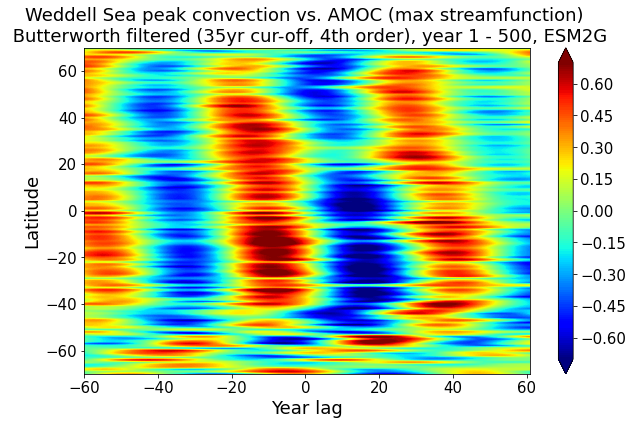

In [33]:
lag_time = 60

fig = plt.figure(figsize=(10,6))

pltdata = []
for i in range(AMOC_max_ESM2G_BWfilt_cut.shape[0]):
    r = lag_cor_data(con_ind_ws_2000_ESM2G_BWfilt, AMOC_max_ESM2G_BWfilt_cut[i,:], lag_time)
    pltdata.append(r)
pltdata = np.asarray(pltdata)
x = np.linspace(-lag_time, lag_time+1, 2*lag_time)
y = np.arange(-70, 71, 1)

x,y = np.meshgrid(x,y)
cmap_limit = np.nanmax(np.abs(pltdata))
levels = np.arange(-0.7,0.71,0.01)
im = plt.contourf(x, y, pltdata, levels, extend = 'both', cmap = plt.cm.jet)
cb = plt.colorbar(im)
cb.ax.tick_params(labelsize=15)
plt.xlabel('Year lag', fontsize = 18)
plt.ylabel('Latitude', fontsize = 18)
plt.xticks(fontsize = 15)    
plt.yticks(fontsize = 15)
plt.title('Weddell Sea peak convection vs. AMOC (max streamfunction) \n Butterworth filtered ({}yr cur-off, {}th order), year 1 - 500, ESM2G'.format(
    CutOff_T, n_order), fontsize = 18)

In [34]:
from intake import open_catalog
url = "https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/master.yaml"
col = open_catalog(url).climate.cmip6_gcs()

/srv/conda/envs/notebook/lib/python3.8/site-packages/intake/catalog/entry.py:77: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  s = self.get(**kwargs)


In [35]:
def rename_coords(ds):
    ds = ds.copy()
    """Rename all depth dim to `lev`"""
    if "olevel" in ds.coords:
        ds = ds.rename({"olevel": "lev"})
    if "lev_partial" in ds.coords:
        ds = ds.rename({"lev_partial": "lev"})
    """Rename all latitude, longitude dim to `lat`,`lon`"""
    if 'latitude' in ds.coords:
        ds = ds.rename({'longitude': 'lon', 'latitude': 'lat'})
    if 'nav_lat' in ds.coords:
        ds = ds.rename({'nav_lon': 'lon', 'nav_lat': 'lat'})
    return ds

def get_dataset(col, var, freq, expe, model, grid):
    dataset = col.search(variable_id = var, table_id = freq, experiment_id = expe, 
                         source_id = model, grid_label = grid).to_dataset_dict(
        zarr_kwargs= {'consolidated': True, 'decode_times':True}, preprocess = rename_coords)
    dataset = dataset[list(dataset)[0]].squeeze('member_id').reset_coords('member_id', drop = True)
    return dataset

In [36]:
model_name = 'GFDL-CM4' 
experiment = 'piControl'
frequency = 'Omon'
variables = ['so', 'thetao']

dataset_gr = get_dataset(col, variables, frequency, experiment, model_name, 'gr')


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [38]:
def sel_time(ds, start_year, end_year, month = None):
    ds = ds.isel(time = slice((start_year-1)*12, end_year*12))
    if month:
        ds = list(ds.groupby("time.month"))[month-1][-1]
    return ds

def smow(t):
    a = (999.842594, 6.793952e-2, -9.095290e-3, 1.001685e-4, -1.120083e-6,
         6.536332e-9)
    T68 = t * 1.00024
    return (a[0] + (a[1] + (a[2] + (a[3] + (a[4] + a[5] * T68) * T68) * T68) *
            T68) * T68)

def dens0(s, t):
    T68 = t * 1.00024
    b = (8.24493e-1, -4.0899e-3, 7.6438e-5, -8.2467e-7, 5.3875e-9)
    c = (-5.72466e-3, 1.0227e-4, -1.6546e-6)
    d = 4.8314e-4
    return (smow(t) + (b[0] + (b[1] + (b[2] + (b[3] + b[4] * T68) * T68) *
            T68) * T68) * s + (c[0] + (c[1] + c[2] * T68) * T68) * s *
            s ** 0.5 + d * s ** 2)

In [39]:
da_t = sel_time(dataset_gr.thetao, 1, 500)
da_s = sel_time(dataset_gr.so, 1, 500)
da_dens = sel_time(dens0(da_s, da_t), 1, 500, month = 9)

In [40]:
da_dens

,Array,Chunk
Bytes,4.54 GB,27.22 MB
Shape,"(500, 35, 180, 360)","(3, 35, 180, 360)"
Count,9362 Tasks,240 Chunks
Type,float32,numpy.ndarray


In [43]:
dens_ws = da_dens.sel(lat = slice(-70, -55), lon = slice(300, 360)).mean(dim = 'lon', skipna = True).mean(dim = 'lat', skipna = True)
dens_rs = da_dens.sel(lat = slice(-90, -50), lon = slice(160, 230)).mean(dim = 'lon', skipna = True).mean(dim = 'lat', skipna = True)

In [45]:
from dask_gateway import Gateway
gateway = Gateway()
options = gateway.cluster_options()

options.worker_cores = 16 #16 / 4
options.worker_memory = 32 #32 / 8  

cluster = gateway.new_cluster(options)
cluster.adapt(minimum = 0, maximum = 120)

client = cluster.get_client() 
cluster

/srv/conda/envs/notebook/lib/python3.8/site-packages/dask_gateway/client.py:695: GatewayWarning: Adapt with `maximum=120, minimum=0` workers would exceed resource limit of 19 workers. Using `maximum=19, minimum=0` instead.
  warnings.warn(GatewayWarning(msg["msg"]))


In [46]:
dens_ws.load()
dens_rs.load()

<xarray.DataArray (time: 500, lev: 35)>
array([[1027.4479, 1027.4471, 1027.4452, ..., 1027.8256, 1027.8234,
        1027.8232],
       [1027.449 , 1027.448 , 1027.4446, ..., 1027.8254, 1027.8234,
        1027.8232],
       [1027.439 , 1027.4384, 1027.4359, ..., 1027.8256, 1027.8234,
        1027.8231],
       ...,
       [1027.4198, 1027.4197, 1027.4178, ..., 1027.7949, 1027.7928,
        1027.7952],
       [1027.4507, 1027.4504, 1027.4487, ..., 1027.7948, 1027.7927,
        1027.7949],
       [1027.4326, 1027.4321, 1027.4307, ..., 1027.7946, 1027.7924,
        1027.7946]], dtype=float32)
Coordinates:
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * time     (time) object 0151-09-16 00:00:00 ... 0650-09-16 00:00:00

In [58]:
potential_density_WS_CM2MC

array([ 2.7205e+01,  2.7244e+01,  2.7323e+01,  2.7389e+01,  2.7437e+01,
        2.7470e+01,  2.7497e+01,  2.7520e+01,  2.7542e+01,  2.7562e+01,
        2.7579e+01,  2.7595e+01,  2.7611e+01,  2.7628e+01,  2.7645e+01,
        2.7660e+01,  2.7674e+01,  2.7684e+01,  2.7692e+01,  2.7699e+01,
        2.7704e+01,  2.7710e+01,  2.7714e+01,  2.7718e+01,  2.7722e+01,
        2.7726e+01,  2.7729e+01, -1.0000e+34])

In [63]:
depths_CM2MC[20]

2087.2

Text(0.5, 1.0, 'Mean Potential Density profile, Weddell Sea[55S-70S, 60W-0]')

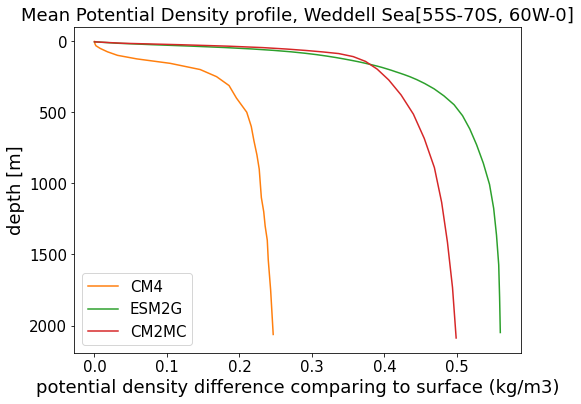

In [73]:
fig = plt.figure(figsize = (8,6))

dens_CM4 = dens_ws.sel(lev = slice(0, 2100)).mean(dim = 'time')
dep_CM4 = dens_ws.sel(lev = slice(0, 2100)).lev.values
dens_M2G = potential_density_WS_ESM2G[0:40,1]
dep_M2G = potential_density_WS_ESM2G[0:40,0]
dens_2MC = potential_density_WS_CM2MC[0:21]
dep_2MC = depths_CM2MC[0:21]

plt.plot(dens_CM4-dens_CM4.isel(lev=0), dep_CM4, color = 'C1', label = 'CM4')
plt.plot(dens_M2G-dens_M2G[0], dep_M2G, color = 'C2', label = 'ESM2G')
plt.plot(dens_2MC-dens_2MC[0], dep_2MC, color = 'C3', label = 'CM2MC')

plt.gca().invert_yaxis()
plt.xlabel('potential density difference comparing to surface (kg/m3)', fontsize=18)
plt.ylabel('depth [m]', fontsize=18)
plt.xticks(fontsize = 15)    
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.title('Mean Potential Density profile, Weddell Sea[55S-70S, 60W-0]', fontsize=18)

Text(0.5, 1.0, 'Mean Potential Density profile, Ross Sea[50S-90S, 160E-230E]')

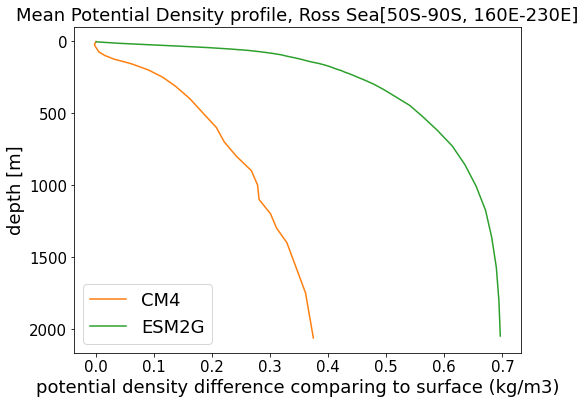

In [74]:
fig = plt.figure(figsize = (8,6))

dens_CM4 = dens_rs.sel(lev = slice(0, 2100)).mean(dim = 'time')
dep_CM4 = dens_rs.sel(lev = slice(0, 2100)).lev.values
dens_M2G = potential_density_RS_ESM2G[0:40,1]
dep_M2G = potential_density_RS_ESM2G[0:40,0]

plt.plot(dens_CM4-dens_CM4.isel(lev=0), dep_CM4, color = 'C1', label = 'CM4')
plt.plot(dens_M2G-dens_M2G[0], dep_M2G, color = 'C2', label = 'ESM2G')

plt.gca().invert_yaxis()
plt.xlabel('potential density difference comparing to surface (kg/m3)', fontsize=18)
plt.ylabel('depth [m]', fontsize=18)
plt.xticks(fontsize = 15)    
plt.yticks(fontsize = 15)
plt.legend(fontsize = 18)
plt.title('Mean Potential Density profile, Ross Sea[50S-90S, 160E-230E]', fontsize=18)

In [64]:
client.close()
cluster.close()